In [1]:
import numpy as np
import matplotlib.pyplot as plt
import neuscitk.neuscitk as ntk

In [2]:
dataset = ntk.LabChartDataset('./assets/datasets/cockroach_lab.mat')

In [3]:
spont = dataset.concat_blocks(np.arange(-10, 0))

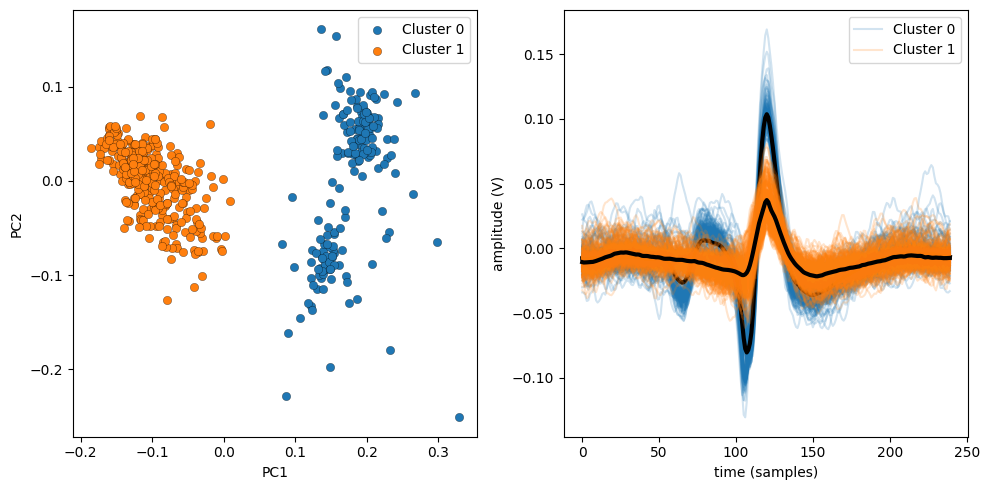

In [4]:
spont_sorted = ntk.sort_spikes(spont[0], dataset.fs, threshold_multiplier=5.5, waveform_window=3 * 40, cluster_dimensions=10)
spont_sorted.plot_clusters()

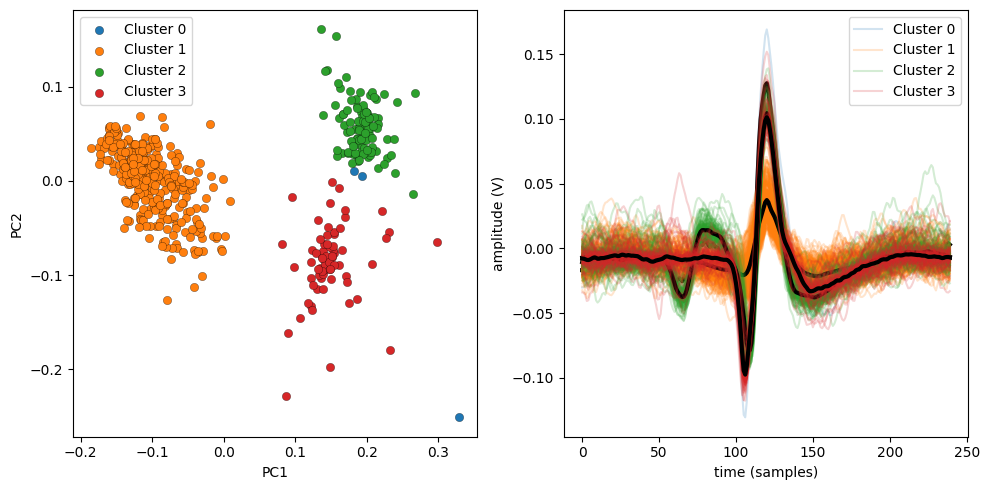

In [5]:
spont_sorted.hand_pick_clusters()
spont_sorted.plot_clusters()

In [8]:
bristle_1 = dataset.concat_blocks(np.arange(0, 50))
sorted_bristle_1 = ntk.sort_spikes(bristle_1[0], dataset.fs, threshold_multiplier=5.5, waveform_window=3 * 40, cluster_dimensions=10)

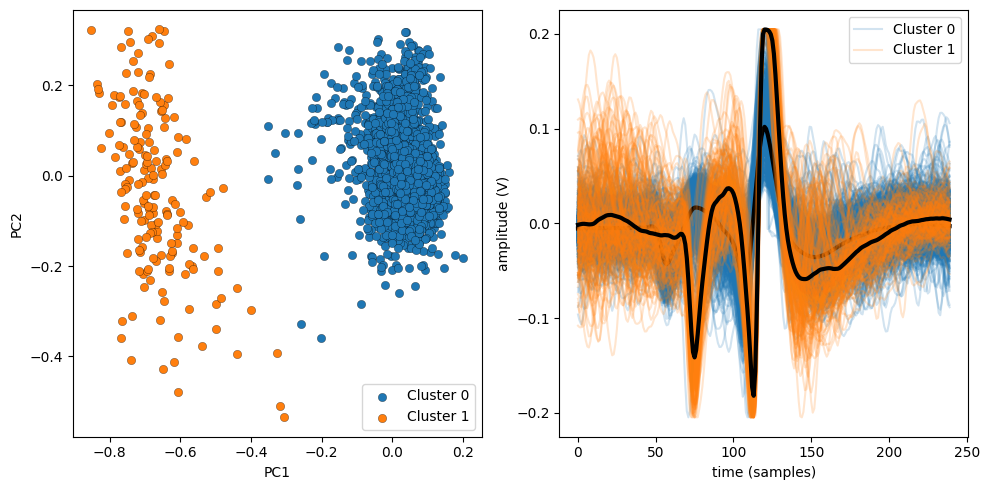

In [9]:
sorted_bristle_1.plot_clusters()

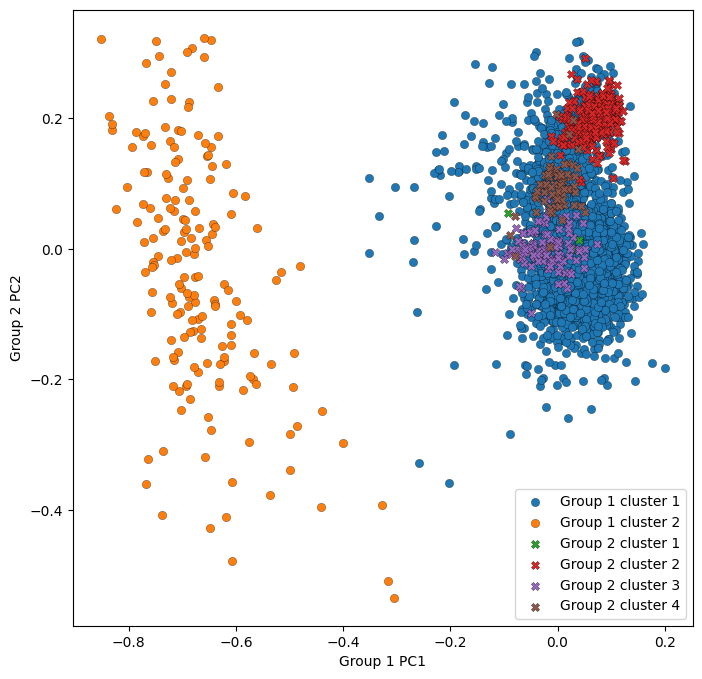

In [12]:
ntk.compare_clusters(sorted_bristle_1, spont_sorted)

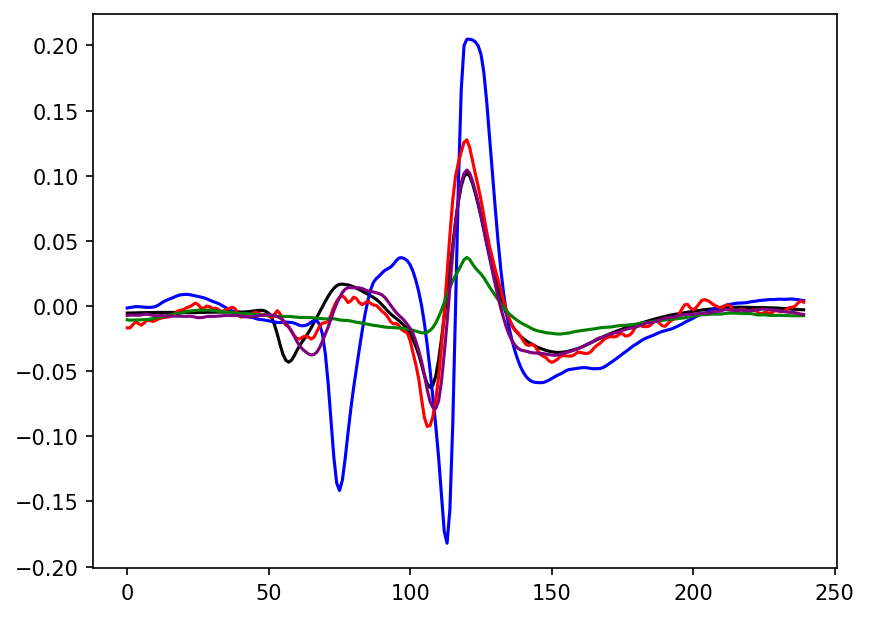

In [15]:
plt.rcParams['figure.dpi'] = 150
plt.plot(sorted_bristle_1.get_cluster_waveforms(0).mean(0), color='k')
plt.plot(sorted_bristle_1.get_cluster_waveforms(1).mean(0), color='b')
plt.plot(spont_sorted.get_cluster_waveforms(0).mean(0), color='r')
plt.plot(spont_sorted.get_cluster_waveforms(1).mean(0), color='g')
plt.plot(spont_sorted.get_cluster_waveforms(2).mean(0), color='purple')
plt.show()

In [25]:
stim_averages = ntk.spike_triggered_average(bristle_1[1], sorted_bristle_1.get_cluster_spike_times(1), 40)

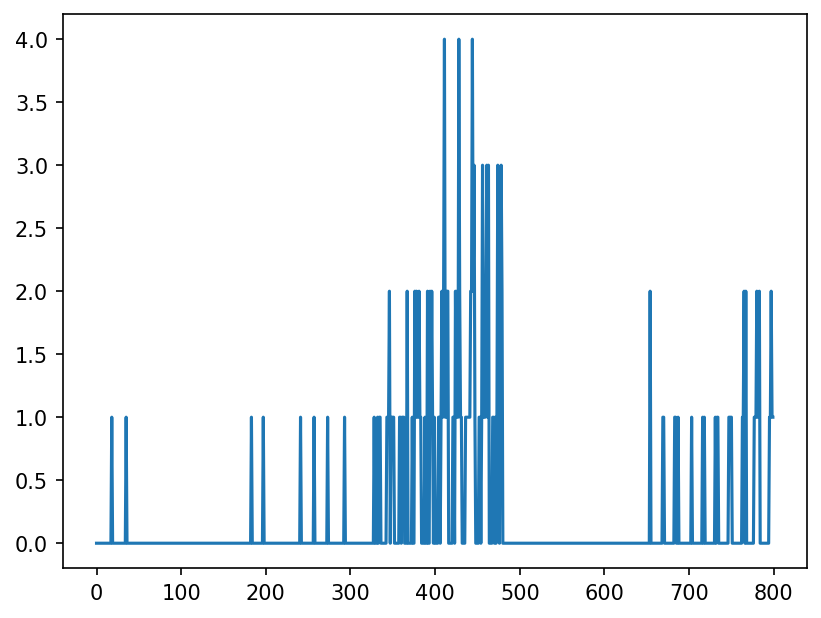

In [38]:
binned_spikes = sorted_bristle_1.get_spike_train(1).reshape(40 * 20, -1).sum(1)
plt.plot(binned_spikes)

## `LabChartDataset` methods

1. `fs`
2. `get_block`
3. `concat_blocks`
4. `organize_by_pages`
5. `get_page`